In [1]:
import pandas as pd
import zipfile
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import lzma
import json
import numpy as np
import colorcet as cc
import re
from matplotlib.ticker import ScalarFormatter


sns.set_theme(font_scale=0.81666666666666666)
plt.rc('text', usetex=True)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
plt.rc('text.latex', preamble=
    r'''
    \RequirePackage[T1]{fontenc}
    \RequirePackage{amsmath}
    \RequirePackage{siunitx}
    \RequirePackage[super]{nth}
    ''')

# Load compressed data

In [2]:
with lzma.open("./02_sammy_summary_data.json.xz", "rt") as f:
    sammy_data = json.load(f)
with lzma.open("./02_nosimp_summary_data.json.xz", "rt") as f:
    nosimp_data = json.load(f)
with lzma.open("./02_baseline_summary_data.json.xz", "rt") as f:
    baseline_data = json.load(f)
with lzma.open("./02_samplns_summary_data.json.xz", "rt") as f:
    samplns_data = json.load(f)

In [3]:
sammy_dataframe = pd.DataFrame.from_dict(sammy_data, orient='index')
sammy_dataframe.head()

,one_optimal,all_optimal,optimalities,lb_histories,ub_histories,ubs,min_ub,max_ub,avg_ub,med_ub,...,simplification_simplification_rounds,simplification_simplification_time,simplification_variables_after,simplification_variables_before,simplification_variables_eliminated_by_equality,simplification_variables_eliminated_by_resolution,simplification_variables_fixed,num_clauses,num_variables,num_concrete
calculate,True,True,"[True, True, True, True, True]","[[{'time': 0.001837014, 'lb': 3, 'source': 'in...","[[{'time': 0.001139213, 'ub': 6, 'source': 'in...","[5, 5, 5, 5, 5]",5,5,5.0,5.0,...,2,0.000030,5,8,0,2,1,13,8,5
car,True,True,"[True, True, True, True, True]","[[{'time': 0.002262744, 'lb': 3, 'source': 'in...","[[{'time': 0.001708173, 'ub': 5, 'source': 'in...","[5, 5, 5, 5, 5]",5,5,5.0,5.0,...,2,0.000045,4,14,3,1,6,26,14,9
FameDB,True,True,"[True, True, True, True, True]","[[{'time': 0.002316873, 'lb': 2, 'source': 'in...","[[{'time': 0.00184072, 'ub': 10, 'source': 'in...","[8, 8, 8, 8, 8]",8,8,8.0,8.0,...,1,0.000039,11,15,3,0,1,26,15,13
uclibc_2020-12-24_11-54-53,True,True,"[True, True, True, True, True]","[[{'time': 0.037270821, 'lb': 154, 'source': '...","[[{'time': 0.019062272, 'ub': 367, 'source': '...","[365, 365, 365, 365, 365]",365,365,365.0,365.0,...,2,0.003681,244,272,15,0,13,1670,272,272
aaed2000,True,True,"[True, True, True, True, True]","[[{'time': 0.044572889, 'lb': 25, 'source': 'i...","[[{'time': 0.040025406, 'ub': 88, 'source': 'i...","[52, 52, 52, 52, 52]",52,52,52.0,52.0,...,4,0.015554,643,1183,218,260,64,2190,1183,819


In [46]:
sammy_dataframe.keys()

Index(['one_optimal', 'all_optimal', 'optimalities', 'lb_histories',
       'ub_histories', 'ubs', 'min_ub', 'max_ub', 'avg_ub', 'med_ub', 'lbs',
       'min_lb', 'max_lb', 'avg_lb', 'med_lb', 'initial_lbs', 'min_initial_lb',
       'max_initial_lb', 'avg_initial_lb', 'med_initial_lb', 'initial_ubs',
       'min_initial_ub', 'max_initial_ub', 'avg_initial_ub', 'med_initial_ub',
       'solve_times', 'min_solve_time', 'max_solve_time', 'avg_solve_time',
       'med_solve_time', 'initial_times', 'min_initial_time',
       'max_initial_time', 'avg_initial_time', 'med_initial_time',
       'first_sol_times', 'min_first_sol_time', 'max_first_sol_time',
       'avg_first_sol_time', 'med_first_sol_time', 'first_sol_sizes',
       'min_first_sol_size', 'max_first_sol_size', 'avg_first_sol_size',
       'med_first_sol_size', 'interactions_nonreduced',
       'interactions_reduceds', 'min_interactions_reduced',
       'max_interactions_reduced', 'avg_interactions_reduced',
       'med_interactio

In [5]:
nosimp_dataframe = pd.DataFrame.from_dict(nosimp_data, orient='index')
nosimp_dataframe.head()

,initial_lbs,initial_ubs,initial_times,first_sol_times,feature_count_nonreduced,initial_lb_mean,initial_lb_med,initial_lb_max,initial_lb_min,initial_ub_mean,...,initial_ub_max,initial_ub_min,initial_time_mean,initial_time_med,initial_time_max,initial_time_min,first_sol_time_mean,first_sol_time_med,first_sol_time_max,first_sol_time_min
fiasco_2020-12-01_14-09-14,"[178, 188, 186, 183, 190]","[211, 215, 212, 212, 214]","[5.0645633, 5.054784119, 5.00945457, 5.0540397...","[0.034607112, 0.035122432, 0.034385491, 0.0366...",102755,185.0,186.0,190,178,212.8,...,215,211,5.048724,5.054784,5.064563,5.009455,0.034990,0.034607,0.036662,0.034171
Violet,"[10, 10, 10, 10, 10]","[22, 22, 22, 22, 22]","[5.003393852, 5.004259515, 5.004422196, 5.0025...","[0.002064008, 0.002683827, 0.004219241, 0.0024...",14517,10.0,10.0,10,10,22.0,...,22,22,5.003676,5.003715,5.004422,5.002590,0.002707,0.002444,0.004219,0.002064
aaed2000,"[44, 45, 46, 45, 43]","[82, 82, 82, 82, 83]","[5.050358793, 5.071151129, 5.078167455, 5.0749...","[0.036645471, 0.036618852, 0.037041641, 0.0371...",1250781,44.6,45.0,46,43,82.2,...,83,82,5.060110,5.071151,5.078167,5.025942,0.036717,0.036645,0.037124,0.036157
BattleofTanks,"[255, 255, 255, 255, 255]","[387, 387, 387, 387, 381]","[5.01155042, 5.006220086, 5.004404525, 5.00240...","[0.008619918, 0.009718361, 0.009171514, 0.0082...",33452,255.0,255.0,255,255,385.8,...,387,381,5.008516,5.006220,5.017995,5.002408,0.009029,0.009172,0.009718,0.008274
lcm,"[5, 5, 5, 5, 5]","[6, 6, 6, 6, 6]","[5.001215341, 5.000732702, 5.000212735, 5.0017...","[0.00118004, 0.00068733, 0.00022337, 0.0017209...",37,5.0,5.0,5,5,6.0,...,6,6,5.001041,5.001215,5.001757,5.000213,0.001019,0.001180,0.001721,0.000223


In [6]:
nosimp_dataframe.keys()

Index(['initial_lbs', 'initial_ubs', 'initial_times', 'first_sol_times',
       'feature_count_nonreduced', 'initial_lb_mean', 'initial_lb_med',
       'initial_lb_max', 'initial_lb_min', 'initial_ub_mean', 'initial_ub_med',
       'initial_ub_max', 'initial_ub_min', 'initial_time_mean',
       'initial_time_med', 'initial_time_max', 'initial_time_min',
       'first_sol_time_mean', 'first_sol_time_med', 'first_sol_time_max',
       'first_sol_time_min'],
      dtype='object')

# Comparison with and without simplification
## Time to first solution (including simplification time, on instances where that is non-negligible)

In [7]:
simp_comparison_table = []
instances_with_significant_time = set(sammy_dataframe.query('max_first_sol_time > 0.5').index)
instances_with_significant_time.update(
    set(nosimp_dataframe.query('first_sol_time_max > 0.5').index))
instances_with_significant_time

{'Automotive01',
 'Automotive02_V1',
 'Automotive02_V2',
 'Automotive02_V3',
 'Automotive02_V4',
 'EMBToolkit',
 'FreeBSD-8_0_0',
 'financial-services-2018-04-23',
 'financial_services',
 'linux_2_6_28_6',
 'linux_2_6_33_3'}

In [8]:
for instance in instances_with_significant_time:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    for fssimp, fsnosimp in zip(sammy_entry['first_sol_times'], nosimp_entry['first_sol_times']):
        simp_comparison_table.append({
            'instance': instance,
            'category': '\\nth{1} sol. time',
            'fraction': fssimp / fsnosimp
        })

## Gap after initial phase
This is all over the place and would make the plot unreadable.

In [9]:
for instance in sammy_data:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    for ubsimp, lbsimp, ubnosimp, lbnosimp in zip(
        sammy_entry['initial_ubs'],
        sammy_entry['initial_lbs'],
        nosimp_entry['initial_ubs'],
        nosimp_entry['initial_lbs']
    ):
        gap_simp = (ubsimp - lbsimp) / lbsimp
        gap_nosimp = (ubnosimp - lbnosimp) / lbnosimp
        simp_comparison_table.append({
            'instance': instance,
            'category': 'initial_gap',
            'fraction': gap_simp / gap_nosimp
        })

## Number of variables, concretes, clauses, formula size

In [10]:
for instance in sammy_data:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    simp_comparison_table.append({
        'instance': instance,
        'category': 'variables',
        'fraction': sammy_entry['simplification_variables_after'] / \
                    sammy_entry['simplification_variables_before']
    })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'clauses',
        'fraction': sammy_entry['simplification_clauses_after'] / \
                    sammy_entry['simplification_clauses_before']
    })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'formula size',
        'fraction': sammy_entry['simplification_formula_length_after'] / \
                    sammy_entry['simplification_formula_length_before']
    })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'concrete features',
        'fraction': sammy_entry['simplification_concrete_after'] / \
                    sammy_entry['simplification_concrete_before']
    })

## Number of interactions

In [11]:
for instance in sammy_data:
    sammy_entry = sammy_data[instance]
    nosimp_entry = nosimp_data[instance]
    nosimp_interactions = nosimp_entry['feature_count_nonreduced']
    for num_reduced in sammy_entry['interactions_reduceds']:
        simp_comparison_table.append({
            'instance': instance,
            'category': 'feas.~int.~(UR/S)',
            'fraction': num_reduced / nosimp_interactions
        })
    simp_comparison_table.append({
        'instance': instance,
        'category': 'feas.~int.~(S)',
        'fraction': sammy_entry['interactions_nonreduced'] / nosimp_interactions
    })

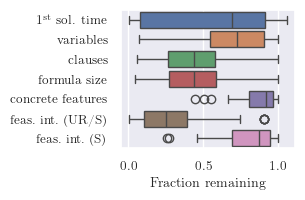

In [12]:
simp_comparison_table_df = pd.DataFrame(simp_comparison_table)
sns.boxplot(data=simp_comparison_table_df.query('category != "initial_gap"'),
            x='fraction', y='category', hue='category')
plt.gca().set_ylabel('')
plt.gca().set_xlabel('Fraction remaining')
plt.gcf().set_size_inches(2.25, 1.8)
plt.savefig('impact_of_simplification.pdf',
            bbox_inches='tight',
            pad_inches=0.05)

# Comparison to baselines
## Number of instances solved

In [13]:
baseline_num_solved = {}
for algorithm, algorithm_data in baseline_data.items():
    num_any_solved = 0
    num_all_solved = 0
    not_solved = []
    not_all_solved = []
    for instance, result in algorithm_data.items():
        is_all_solved = (result["runs"] == result["solved"])
        is_any_solved = (result["solved"] > 0)
        if not is_any_solved:
            not_solved.append(instance)
        elif not is_all_solved:
            not_all_solved.append(instance)
        num_any_solved += is_any_solved
        num_all_solved += is_all_solved
    baseline_num_solved[algorithm] = {"num_solved_any_runs": num_any_solved,
                                      "num_solved_all_runs": num_all_solved,
                                      "not_solved": not_solved,
                                      "not_all_solved": not_all_solved}

not_solved = []
not_all_solved = []
num_any_solved = 0
num_all_solved = 0
for instance, result in samplns_data.items():
    is_all_solved = (result["runs"] == result["solved"])
    is_any_solved = (result["solved"] > 0)
    if not is_any_solved:
        not_solved.append(instance)
    elif not is_all_solved:
        not_all_solved.append(instance)
    num_any_solved += is_any_solved
    num_all_solved += is_all_solved
baseline_num_solved["SampLNS"] = {
    "num_solved_any_runs": num_any_solved,
    "num_solved_all_runs": num_all_solved,
    "not_solved": not_solved,
    "not_all_solved": not_all_solved,
}
baseline_num_solved = pd.DataFrame.from_dict(baseline_num_solved,
                                             orient="index")
baseline_num_solved.sort_values("num_solved_any_runs", ascending=False)

,num_solved_any_runs,num_solved_all_runs,not_solved,not_all_solved
YASA10,51,51,"[Automotive02_V2, Automotive02_V1, Automotive0...",[]
YASA,51,51,"[Automotive02_V2, Automotive02_V4, Automotive0...",[]
IL,51,51,"[Automotive02_V4, Automotive02_V3, Automotive0...",[]
YASA5,51,51,"[Automotive02_V2, Automotive02_V3, Automotive0...",[]
YASA3,51,51,"[Automotive02_V2, Automotive02_V3, Automotive0...",[]
IC,49,49,"[Automotive02_V2, Automotive02_V1, Automotive0...",[]
CH,46,46,"[Automotive02_V4, Automotive02_V2, Automotive0...",[]
IPOF_FT,29,24,"[PPU, linux_2_6_33_3, soletta_2017-03-09_21-02...","[XSEngine, DMIE, atlas_mips32_4kc, eCos-3-0_i3..."
IPOG_FT,28,24,"[linux_2_6_33_3, soletta_2017-03-09_21-02-40, ...","[DMIE, XSEngine, atlas_mips32_4kc, integrator_..."
IPOF_CSP,23,23,"[PPU, linux_2_6_33_3, soletta_2017-03-09_21-02...",[]


## Heuristic runtime comparison
### Cactus plot information for baseline heuristics

In [14]:
def median_solve_time(result):
    solve_times = list(result['solve_times'])
    solve_times += [math.inf] * (result['runs'] - len(solve_times))
    solve_times.sort()
    return solve_times[len(solve_times) // 2]

heuristic_baselines = {'YASA10', 'YASA', 'IL', 'YASA5', 'YASA3', 
                       'IC', 'CH', 'IPOF_FT', 'IPOG_FT', 'IPOF_CSP', 'IPOG_CSP'}
heuristic_solved_after_time = []
for algorithm, algorithm_data in baseline_data.items():
    if algorithm not in heuristic_baselines:
        continue
    solved_instances = {}
    for instance, result in algorithm_data.items():
        med_solve_time = median_solve_time(result)
        if np.isfinite(med_solve_time):
            solved_instances[instance] = med_solve_time
    instance_solve_times = list(solved_instances.values())
    instance_solve_times.sort()
    heuristic_solved_after_time.append({'heuristic': algorithm,
                                        'time': 0.0,
                                        'solved': 0})
    for index, solve_time in enumerate(instance_solve_times):
        heuristic_solved_after_time.append({
            'heuristic': algorithm,
            'time': np.nextafter(solve_time, -math.inf),
            'solved': index})
        heuristic_solved_after_time.append({
            'heuristic': algorithm,
            'time': solve_time,
            'solved': index + 1
        })
    heuristic_solved_after_time.append({
        'heuristic': algorithm,
        'time': 5000.0,
        'solved': len(instance_solve_times)
    })


### Cactus plot information for sammy initial

In [15]:
sammy_first_times = []
sammy_initial_times = []
for instance, instance_data in sammy_data.items():
    sammy_initial_times.append(instance_data['med_initial_time'])
    sammy_first_times.append(instance_data['med_first_sol_time'])
algonames = ['sammy (first)', 'sammy (initial)']
algolists = [sammy_first_times, sammy_initial_times]
for algoname, algolist in zip(algonames, algolists):
    algolist.sort()
    heuristic_solved_after_time.append({'heuristic': algoname,
                                        'time': 0.0,
                                        'solved': 0})
for algoname, algolist in zip(algonames, algolists):
    for index, t in enumerate(algolist):
        heuristic_solved_after_time.append({'heuristic': algoname,
                                            'time': np.nextafter(t, -math.inf),
                                            'solved': index})
        heuristic_solved_after_time.append({'heuristic': algoname, 
                                            'time': t,
                                            'solved': index+1})
for algoname, algolist in zip(algonames, algolists):
    heuristic_solved_after_time.append({'heuristic': algoname,
                                        'time': 5000.0,
                                        'solved': len(algolist)})

In [16]:
heuristic_solved_after_time_df = pd.DataFrame(heuristic_solved_after_time)

## Actual plot

/var/folders/wd/nrcjx5551993mcd3k2sq9c580000gn/T/ipykernel_37157/1780869275.py:32: UserWarning: The palette list has more values (15) than needed (13), which may not be intended.
  sns.lineplot(data=heuristic_solved_after_time_df, x="time", y="solved",


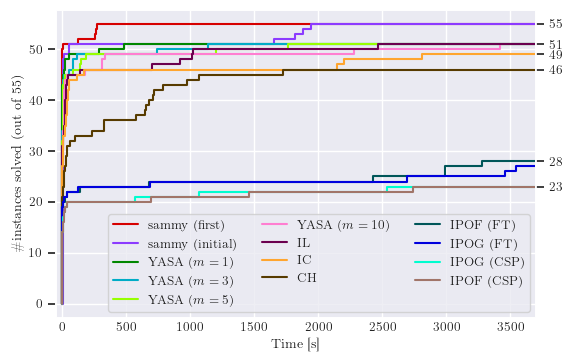

In [59]:
ipofg_re = re.compile(r'^(IPO[FG])_([A-Z]+)$')
def map_algo_names(name):
    if name.startswith('YASA'):
        if name == 'YASA':
            return 'YASA $(m = 1)$'
        return f'YASA $(m = {name[4:]})$'
    m = ipofg_re.match(name)
    if m:
        return f'{m.group(1)} ({m.group(2)})'
    return name

heuristic_solved_after_time_df['Heuristic'] = \
    heuristic_solved_after_time_df['heuristic'].apply(map_algo_names)
plot_order = [
    'sammy (first)',
    'sammy (initial)',
    'YASA $(m = 1)$',
    'YASA $(m = 3)$',
    'YASA $(m = 5)$',
    'YASA $(m = 10)$',
    'IL',
    'IC',
    'CH',
    'IPOF (FT)',
    'IPOG (FT)',
    'IPOG (CSP)',
    'IPOF (CSP)',
]

ax = plt.gca()
palette = sns.color_palette(cc.glasbey, n_colors=15)
sns.lineplot(data=heuristic_solved_after_time_df, x="time", y="solved",
             hue="Heuristic", ax=ax, palette=palette, hue_order=plot_order)
ax.tick_params(axis='x', pad=-3)
ax.set_xlim(-50, 3700)
ax.set_xlabel("Time [s]")
ax.set_ylabel("\\#instances solved (out of 55)")
ax.legend().set_title("")
sns.move_legend(ax, "lower right", ncol=3)
#ax.set_title('higher is better')
ax2 = ax.twinx()
ax2.grid(False)
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.set_yticks([55, 51, 49, 46, 28, 23])
ax2.set_ylim(*ax.get_ylim())
plt.gcf().set_size_inches(6.2, 4.0)
plt.savefig('heuristic_runtime_cactus.pdf', bbox_inches='tight', 
            pad_inches=0.05)

## Time to proven optimality/within 10% of optimality

In [18]:
def median_time_to_relative_gap(runs, lb_histories, ub_histories, relative_gap):
    assert len(lb_histories) == len(ub_histories)
    times_to_relative_gap = [math.inf] * (runs - len(lb_histories))
    for lb_history, ub_history in zip(lb_histories, ub_histories):
        steps = lb_history + ub_history
        steps.sort(key=lambda x: x['time'])
        best_lb = None
        best_ub = None
        found = False
        for step in steps:
            if 'lb' in step:
                best_lb = step['lb']
            if 'ub' in step:
                best_ub = step['ub']
            if best_lb is not None and best_ub is not None:
                if best_lb * (1.0 + relative_gap) >= best_ub:
                    times_to_relative_gap.append(step['time'])
                    found = True
                    break
        if not found:
            times_to_relative_gap.append(math.inf)
    times_to_relative_gap.sort()
    return times_to_relative_gap[len(times_to_relative_gap) // 2]

In [19]:
time_to_relative_gap_info = []

for instance, instance_data in sammy_data.items():
    time = median_time_to_relative_gap(len(instance_data['lb_histories']), 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.1)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'sammy (\qty{10}{\percent} gap)',
        'time': time,
    })
    time = median_time_to_relative_gap(len(instance_data['lb_histories']), 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.0)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'sammy (optimality)',
        'time': time,
    })

for instance, instance_data in samplns_data.items():
    time = median_time_to_relative_gap(instance_data['runs'], 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.1)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'SampLNS (\qty{10}{\percent} gap)',
        'time': time,
    })
    time = median_time_to_relative_gap(instance_data['runs'], 
                                       instance_data['lb_histories'], 
                                       instance_data['ub_histories'], 0.0)
    time_to_relative_gap_info.append({
        'instance': instance,
        'algorithm': r'SampLNS (optimality)',
        'time': time,
    })

time_to_relative_gap_info = pd.DataFrame(time_to_relative_gap_info)
time_to_relative_gap_info

,instance,algorithm,time
0,calculate,sammy (\qty{10}{\percent} gap),5.028365
1,calculate,sammy (optimality),5.028365
2,car,sammy (\qty{10}{\percent} gap),5.027931
3,car,sammy (optimality),5.027931
4,FameDB,sammy (\qty{10}{\percent} gap),5.070235
...,...,...,...
113,financial-services-2018-04-23,SampLNS (optimality),inf
114,linux_2_6_33_3,SampLNS (\qty{10}{\percent} gap),inf
115,linux_2_6_33_3,SampLNS (optimality),inf
116,Automotive01,SampLNS (\qty{10}{\percent} gap),inf


In [20]:
def to_num_solved_at_time(dataframe, actual_time_limit, plot_time_limit):
    num_solved = [{'Algorithm': algo, 'time': 0.0, 'solved': 0}
                  for algo in dataframe['algorithm'].unique()]
    algo_num_solved = {algo: 0 for algo in dataframe['algorithm'].unique()}
    algo_finished = {algo: False for algo in dataframe['algorithm'].unique()}
    for row in dataframe.sort_values("time").itertuples():
        algo = row.algorithm
        if row.time > actual_time_limit:
            if not algo_finished[algo]:
                num_solved.append({
                    'Algorithm': algo,
                    'time': plot_time_limit,
                    'solved': algo_num_solved[algo]
                })
                algo_finished[algo] = True
            continue
        num_solved.append({
            'Algorithm': algo,
            'time': np.nextafter(row.time, -math.inf),
            'solved': algo_num_solved[algo]
        })
        algo_num_solved[algo] += 1
        num_solved.append({
            'Algorithm': algo,
            'time': row.time,
            'solved': algo_num_solved[algo]
        })
    for algo, finished in algo_finished.items():
        if not finished:
            num_solved.append({
                'Algorithm': algo,
                'time': plot_time_limit,
                'solved': algo_num_solved[algo]
            })
    return pd.DataFrame(num_solved)

In [21]:
num_solved_after_time = to_num_solved_at_time(time_to_relative_gap_info,
                                              actual_time_limit=3620.0,
                                              plot_time_limit=3800.0)

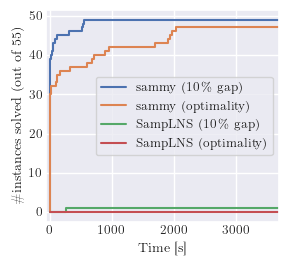

In [ ]:
ax = plt.gca()
sns.lineplot(data=num_solved_after_time, x="time", y="solved",
             hue="Algorithm", ax=ax)
ax.set_xlim(-50, 3700)
ax.set_xlabel("Time [s]")
ax.set_ylabel(r"\#instances solved (out of 55)")
plt.gcf().set_size_inches(3.0, 2.75)
ax.tick_params(axis='x', pad=-3)
ax.tick_params(axis='y', pad=-3)
plt.legend().set_title("")
plt.savefig('lns_runtime_comparison.pdf', bbox_inches='tight')

# Lower bounds

In [23]:
best_lower_bounds = {}
for instance, instance_data in sammy_data.items():
    best_lower_bounds[instance] = instance_data['max_lb']
for instance, best_lb in best_lower_bounds.items():
    if instance not in samplns_data:
        print("WARNING - MISSING INSTANCE", instance, "IN SAMPLNS DATA")
        continue
    samplns_lb = max(samplns_data[instance]['lower_bounds'])
    if samplns_lb > best_lb:
        raise ValueError(f"SampLNS found better bound than sammy for instance {instance}!")

WARNING - MISSING INSTANCE calculate IN SAMPLNS DATA
WARNING - MISSING INSTANCE car IN SAMPLNS DATA
WARNING - MISSING INSTANCE FameDB IN SAMPLNS DATA
WARNING - MISSING INSTANCE uclibc_2020-12-24_11-54-53 IN SAMPLNS DATA
WARNING - MISSING INSTANCE aaed2000 IN SAMPLNS DATA
WARNING - MISSING INSTANCE XSEngine IN SAMPLNS DATA
WARNING - MISSING INSTANCE berkeleyDB1 IN SAMPLNS DATA
WARNING - MISSING INSTANCE FreeBSD-8_0_0 IN SAMPLNS DATA
WARNING - MISSING INSTANCE BankingSoftware IN SAMPLNS DATA
WARNING - MISSING INSTANCE ChatClient IN SAMPLNS DATA
WARNING - MISSING INSTANCE ea2468 IN SAMPLNS DATA
WARNING - MISSING INSTANCE fiasco_2017-09-26_11-30-56 IN SAMPLNS DATA
WARNING - MISSING INSTANCE FeatureIDE IN SAMPLNS DATA
WARNING - MISSING INSTANCE gpl IN SAMPLNS DATA
WARNING - MISSING INSTANCE busybox-1_18_0 IN SAMPLNS DATA
WARNING - MISSING INSTANCE EMBToolkit IN SAMPLNS DATA
WARNING - MISSING INSTANCE dell IN SAMPLNS DATA
WARNING - MISSING INSTANCE DMIE IN SAMPLNS DATA
WARNING - MISSING INST

# Solution quality

In [43]:
solution_quality_to_best_lb = []
def push_sol_quality(algorithm, instance, value):
    solution_quality_to_best_lb.append({
        'Algorithm': algorithm,
        'instance': instance,
        'relative_gap': (value - best_lower_bounds[instance]) / \
                        best_lower_bounds[instance],
    })


for instance, instance_data in sammy_data.items():
    for ub in instance_data['initial_ubs']:
        push_sol_quality('sammy (initial)', instance, ub)
    for ub in instance_data['first_sol_sizes']:
        push_sol_quality('sammy (first)', instance, ub)
    for ub in instance_data['ubs']:
        push_sol_quality('sammy', instance, ub)

for instance, instance_data in samplns_data.items():
    for ub in instance_data['upper_bounds']:
        push_sol_quality('SampLNS', instance, ub)

for algorithm, algorithm_data in baseline_data.items():
    for instance, instance_data in algorithm_data.items():
        for ub in instance_data['n_samples']:
            push_sol_quality(map_algo_names(algorithm), instance, ub)
solution_quality_to_best_lb = pd.DataFrame(solution_quality_to_best_lb)
solution_quality_to_best_lb

,Algorithm,instance,relative_gap
0,sammy (initial),calculate,0.000000
1,sammy (initial),calculate,0.000000
2,sammy (initial),calculate,0.000000
3,sammy (initial),calculate,0.000000
4,sammy (initial),calculate,0.000000
...,...,...,...
3087,YASA $(m = 3)$,Automotive01,0.816981
3088,YASA $(m = 3)$,Automotive01,0.809434
3089,YASA $(m = 3)$,Automotive01,0.837736
3090,YASA $(m = 3)$,Automotive01,0.816981


In [44]:
num_solved_table = baseline_num_solved.reset_index(inplace=False, drop=False)
num_solved_table.rename(columns={'index': 'Algorithm'}, inplace=True)
num_solved_table['Algorithm'] = num_solved_table['Algorithm'].apply(map_algo_names)

def get_num_solved_any_runs(algorithm):
    if 'sammy' in algorithm:
        return 55
    return num_solved_table.query('Algorithm == "{}"'.format(algorithm))['num_solved_any_runs'].iloc[0]

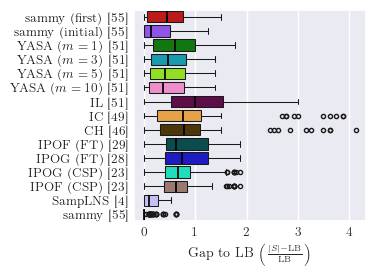

In [45]:
fig, ax = plt.gcf(), plt.gca()
extended_plot_order = plot_order + ['SampLNS', 'sammy']

def name_add_solved(algorithm):
    num_solved = get_num_solved_any_runs(algorithm)
    return f'{algorithm} [{num_solved}]'

extended_plot_order = [name_add_solved(algo) for algo in extended_plot_order]
solution_quality_to_best_lb['AlgorithmWC'] = \
    solution_quality_to_best_lb['Algorithm'].apply(name_add_solved)

sns.boxplot(data=solution_quality_to_best_lb,
            x='relative_gap', y='AlgorithmWC', hue='AlgorithmWC', ax=ax,
            order=extended_plot_order, hue_order=extended_plot_order, 
            palette=palette, fliersize=3, linewidth=0.75, 
            medianprops={'color': 'black', 'linewidth': 1.25})
ax.set_xlabel(r"Gap to LB {\small $\left(\frac{|S| - \operatorname{LB}}{\operatorname{LB}}\right)$}")
ax.set_ylabel("")
ax.tick_params(axis='x', pad=-2)
ax.tick_params(axis='y', pad=-2)
plt.gcf().set_size_inches(3.0, 2.75)
plt.savefig('solution_quality.pdf', bbox_inches='tight')